# Clasificador de estrategias

In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
from math import sqrt
from yellowbrick.cluster import KElbowVisualizer
from statistics import stdev


In [2]:
from pylab import plot,show
from numpy import vstack,array
from numpy.random import rand
import numpy as np
from scipy.cluster.vq import kmeans,vq
import pandas as pd
#import pandas_datareader as dr
from math import sqrt
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA 

In [3]:
'''Data Prep and Model Evaluation'''
from sklearn import preprocessing as pp
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import StratifiedKFold 
from sklearn.metrics import log_loss, accuracy_score
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.metrics import roc_curve, auc, roc_auc_score, mean_squared_error
from keras.utils import to_categorical
from sklearn.metrics import adjusted_rand_score
import random

'''Algos'''
#from kshape.core import kshape, zscore
import tslearn
from tslearn.utils import to_time_series_dataset
from tslearn.clustering import KShape, TimeSeriesScalerMeanVariance
from tslearn.clustering import TimeSeriesKMeans
#import hdbscan

Using TensorFlow backend.


In [4]:
# parameters
n = (252) # number of observation to choose


In [5]:
# Load the data
path = '/Archivos/MIDS/GitHub/models/PI_2/Features.csv'
#Archivos/MIDS/GitHub/models/PI_2/Features.csv
Features = pd.read_csv('Rentabilidad de estrategias base 100.csv', index_col=0)

In [6]:
Features.head(5)

LA1         SA1        LSA1       LA101       SA101  \
Date                                                                     
2008-10-31  112.315749  101.786622  114.102371  114.322571  103.793443   
2008-11-03  108.673546  102.316747  110.996498  106.226580  100.349511   
2008-11-04  125.214699   88.014545  112.375738  127.844695   91.470217   
2008-11-05   99.808765  100.439696  105.439075   98.080355  101.646659   
2008-11-06   80.598195  117.785421  103.353926   75.685445  115.555927   

                LSA101         LA2         SA2       LSA2         LA3  ...  \
Date                                                                   ...   
2008-10-31  118.116014   99.449679   88.920552  88.370231  104.354609  ...   
2008-11-03  105.832219  100.307494   93.034200  93.220667  103.600199  ...   
2008-11-04  118.005653  112.245048   76.940813  88.189179  119.390981  ...   
2008-11-05  103.660622   96.722894   92.773882  94.141451   99.195744  ...   
2008-11-06   94.176416   81.308015  111.866757  98.512300   79.377214  ...   

                LSA53        LA54        SA54      LSA54         LA6  \
Date                                                                   
2008-10-31  81.883986   96.206557   85.677429  81.883986  104.354609   
2008-11-03  90.399733   99.398751   91.744855  90.399733  103.600199   
2008-11-04  80.001433  108.193919   73.073908  80.001433  119.390981   
2008-11-05  89.726586   96.156896   90.086712  89.726586   99.195744   
2008-11-06  97.935928   82.998843  110.656415  97.935928   79.377214   

                   SA6        LSA6       LAMAR       SAMAR     LSAMAR  
Date                                                                   
2008-10-31   93.825481   98.180090   96.206557   85.677429  81.883986  
2008-11-03   96.678447  100.455694   99.398751   91.744855  90.399733  
2008-11-04   83.184769  101.746311  108.193919   73.073908  80.001433  
2008-11-05   97.735318  102.333012   96.156896   90.086712  89.726586  
2008-11-06  113.898740   98.811468   82.998843  110.656415  97.935928  

[5 rows x 27 columns]

In [7]:
df = Features.tail(n)

In [8]:
# Basic summary statistics
data_train = df.T.values
print("Number of time series:", len(data_train))
print("Number of unique classes:", len(np.unique(data_train[:,0])))
print("Time series length:", len(data_train[0,1:]))

Number of time series: 27
Number of unique classes: 27
Time series length: 251


In [9]:
# Prepare the data - Scale
data_scaled = TimeSeriesScalerMeanVariance(mu=0., std=1.).fit_transform(data_train)
 

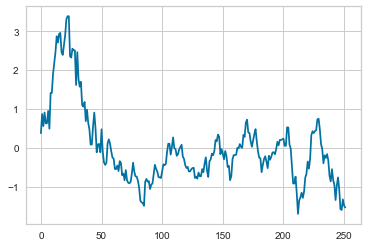

In [10]:
plt.plot(data_scaled[26 ,:,: ] )

In [58]:
print(data_scaled.shape[1])

27


In [27]:
X = data_scaled
distorsions = []
for k in range(2, 15):
    km = TimeSeriesKMeans(n_clusters=k, max_iter=200, n_init=200,tol = 1e-8, \
                      metric="euclidean", verbose=1, random_state=2019);
    km.fit(X);
    distorsions.append(km.inertia_)

Init 1
147.934 --> 83.146 --> 80.825 --> 80.825 --> 
Init 2
108.636 --> 80.825 --> 80.825 --> 
Init 3
99.245 --> 80.825 --> 80.825 --> 
Init 4
203.363 --> 80.390 --> 80.390 --> 
Init 5
211.616 --> 80.390 --> 80.390 --> 
Init 6
292.427 --> 80.390 --> 80.390 --> 
Init 7
95.979 --> 80.825 --> 80.825 --> 
Init 8
287.059 --> 80.390 --> 80.390 --> 
Init 9
93.659 --> 80.390 --> 80.390 --> 
Init 10
107.704 --> 80.825 --> 80.825 --> 
Init 11
146.421 --> 80.825 --> 80.825 --> 
Init 12
171.791 --> 80.390 --> 80.390 --> 
Init 13
93.360 --> 80.390 --> 80.390 --> 
Init 14
99.494 --> 80.825 --> 80.825 --> 
Init 15
96.537 --> 80.390 --> 80.390 --> 
Init 16
95.047 --> 80.825 --> 80.825 --> 
Init 17
111.173 --> 80.825 --> 80.825 --> 
Init 18
139.621 --> 80.825 --> 80.825 --> 
Init 19
99.585 --> 80.825 --> 80.825 --> 
Init 20
352.580 --> 95.296 --> 80.825 --> 80.825 --> 
Init 21
99.961 --> 80.825 --> 80.825 --> 
Init 22
136.473 --> 80.390 --> 80.390 --> 
Init 23
95.020 --> 80.390 --> 80.390 --> 
Init 24


Text(0.5, 1.0, 'Elbow curve')

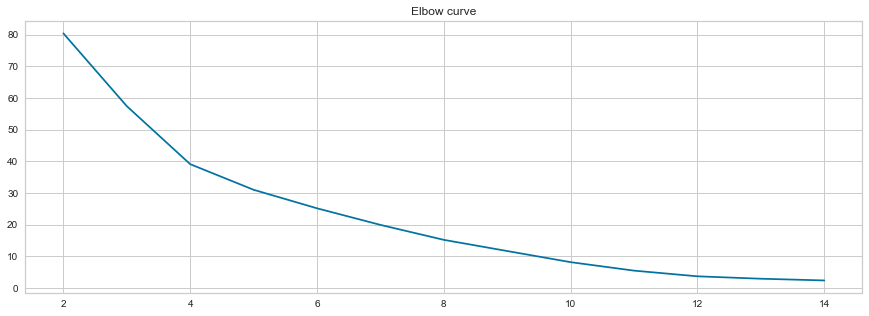

In [28]:
fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 15), distorsions)
plt.grid(True)
plt.title('Elbow curve')

In [ ]:
# correr el Kshapes con el k seleccionado

In [35]:


km = TimeSeriesKMeans(n_clusters=12, max_iter=200, n_init=200,tol = 1e-8, \
                      metric="euclidean", verbose=1, random_state=2019);
km.fit(X);
preds = km.fit_predict(X)
  
print('\nCluster labels:')
print(km.labels_)


Init 1
7.807 --> 3.985 --> 3.746 --> 3.746 --> 
Init 2
6.862 --> 3.985 --> 3.746 --> 3.746 --> 
Init 3
7.397 --> 3.985 --> 3.746 --> 3.746 --> 
Init 4
6.041 --> 3.652 --> 3.652 --> 
Init 5
7.426 --> 4.067 --> 3.838 --> 3.652 --> 3.652 --> 
Init 6
9.225 --> 6.941 --> 6.941 --> 
Init 7
8.755 --> 5.073 --> 5.024 --> 5.024 --> 
Init 8
7.814 --> 4.023 --> 4.023 --> 
Init 9
6.020 --> 3.652 --> 3.652 --> 
Init 10
6.830 --> 4.067 --> 3.838 --> 3.652 --> 3.652 --> 
Init 11
9.413 --> 6.954 --> 6.715 --> 6.715 --> 
Init 12
7.626 --> 3.746 --> 3.746 --> 
Init 13
6.630 --> 3.746 --> 3.746 --> 
Init 14
8.342 --> 3.985 --> 3.746 --> 3.746 --> 
Init 15
9.370 --> 7.361 --> 7.361 --> 
Init 16
5.782 --> 3.746 --> 3.746 --> 
Init 17
6.745 --> 4.023 --> 4.023 --> 
Init 18
6.142 --> 3.652 --> 3.652 --> 
Init 19
6.517 --> 3.652 --> 3.652 --> 
Init 20
7.249 --> 4.023 --> 4.023 --> 
Init 21
7.220 --> 3.652 --> 3.652 --> 
Init 22
8.798 --> 4.023 --> 4.023 --> 
Init 23
6.613 --> 3.652 --> 3.652 --> 
Init 24
7.93

In [36]:
# dataframe con las estrategias y con la asignacion a cada cluster

In [37]:
index =list(range(len(Features.columns)))
columns = ['strategies','clusters', 'selection']


results = pd.DataFrame(index=index, columns=columns)

results ['clusters'] = km.labels_
results ['strategies'] = Features.columns
 

In [38]:
results

strategies  clusters selection
0         LA1        11       NaN
1         SA1         2       NaN
2        LSA1         3       NaN
3       LA101        11       NaN
4       SA101         2       NaN
5      LSA101         6       NaN
6         LA2        11       NaN
7         SA2         2       NaN
8        LSA2        10       NaN
9         LA3        11       NaN
10        SA3         2       NaN
11       LSA3         7       NaN
12       LA44         1       NaN
13       SA44         2       NaN
14      LSA44         4       NaN
15       LA53         1       NaN
16       SA53         2       NaN
17      LSA53         8       NaN
18       LA54         1       NaN
19       SA54         2       NaN
20      LSA54         5       NaN
21        LA6         1       NaN
22        SA6         2       NaN
23       LSA6         9       NaN
24      LAMAR        11       NaN
25      SAMAR         2       NaN
26     LSAMAR         0       NaN

In [39]:
sharpeclusters =[] 
Features = Features.tail(n)
for i in range(results['clusters'].nunique()):
    
    l = results.loc[results['clusters'] == i].index.values.astype(int).tolist()
    dfexp=Features.pct_change().iloc[: , l].sum(axis = 1, skipna = True)
    r = dfexp.mean()
    s = stdev(dfexp)
    
    sharpeclusters.append(r/s)
sharpeclusters = np.asanyarray(sharpeclusters)



In [40]:
selection = sharpeclusters.argmax()
cond = results['clusters'] == selection

results['selection'] = np.where(cond, 1, 0)

In [41]:
results['selection']

0     0
1     0
2     0
3     0
4     0
5     1
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
Name: selection, dtype: int32